# Linear Regression from scratch in Python.

Linear Regression is a Machine learning algorithm in which we create a linear relationship between the data, by simply finding a best fit line which can give out result. 

Let's implement it from scratch.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

## Boston Housing Dataset

By the looks of it it contains a lot of parameteres to define proces of houses across Boston.

Let's load the dataset and plot RM vs MEDV (No. of ROOMS vs Median Hourse Value).

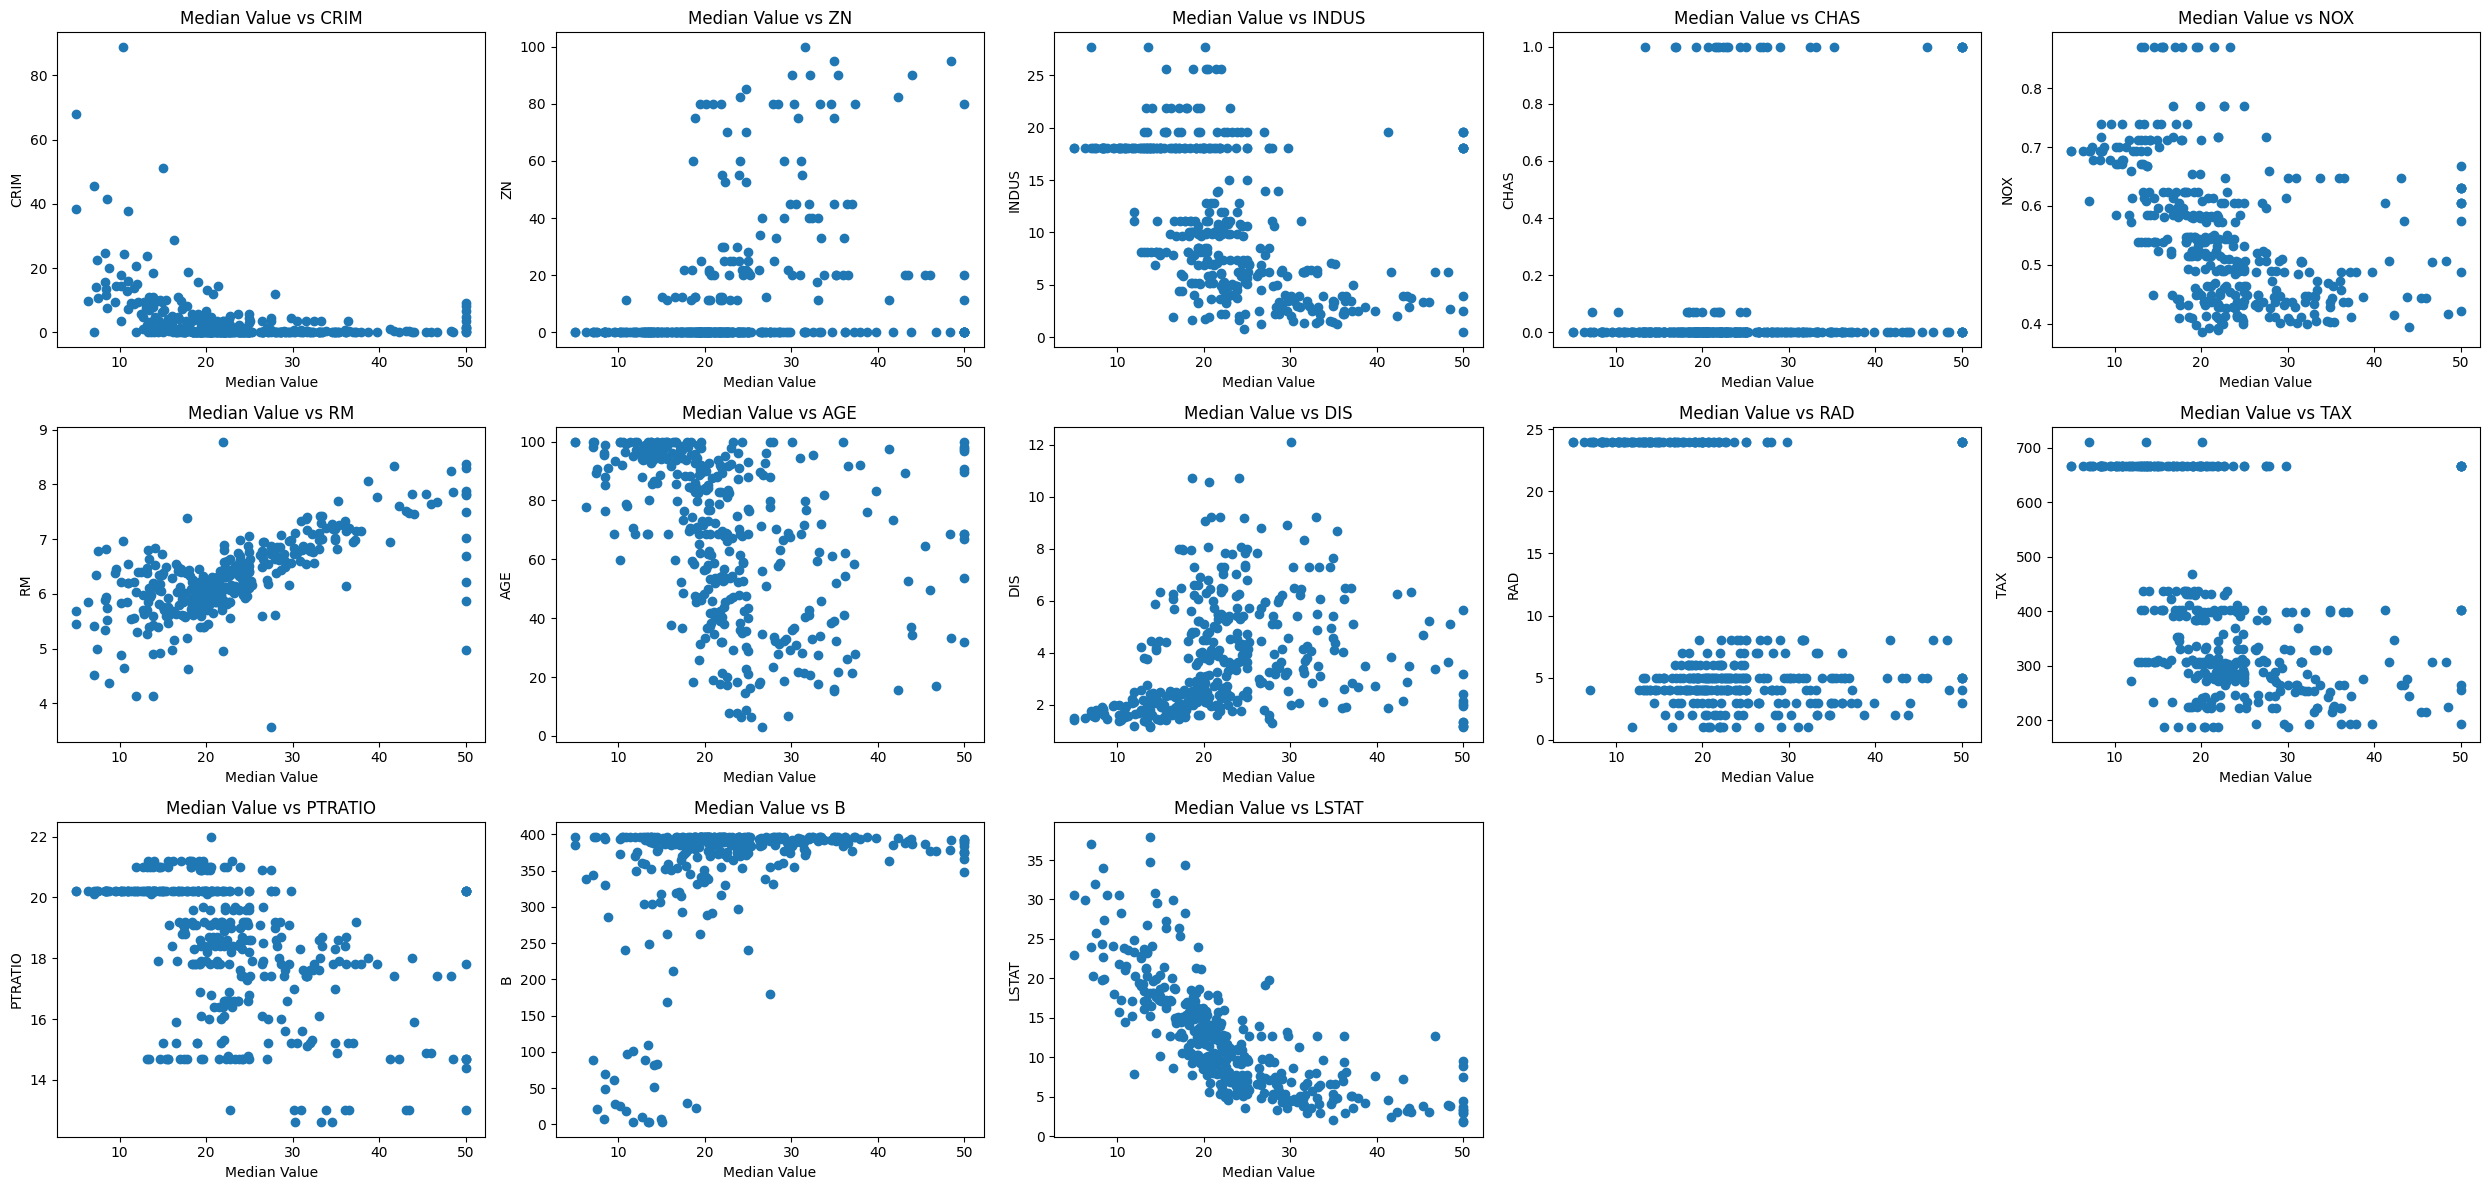

In [37]:
data = pd.read_csv('HousingData.csv')

data = data.fillna(data.mean())

x = data.drop(columns='MEDV')

x_df = x
x = x.to_numpy()

y = data['MEDV'].to_numpy()

shuffled_indices = np.random.permutation(x.shape[0])
n_test_samples = int(x.shape[0] * 0.25)

test_indices = shuffled_indices[:n_test_samples]
train_indices = shuffled_indices[n_test_samples:]

x_train = x[train_indices]
y_train = y[train_indices]
x_test = x[test_indices]
y_test = y[test_indices]

n_features = x_train.shape[1]
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(x_df.columns):
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(y_train, x_train[:, i])
    plt.ylabel(col)
    plt.xlabel("Median Value")
    plt.title(f"Median Value vs {col}")

plt.tight_layout()
plt.show()

## Feature Scaling

In order to make learning more effective we'll use Z-score Normalization across our data to ensure that all the values are in similar range. This will help in converging the values.

In [38]:
def zscore_normalize(x):
    mean = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    x_norm = (x - mean) / sigma

    return x_norm, mean, sigma

x_train = zscore_normalize(x_train)[0]
x_test = zscore_normalize(x_test)[0]

## Cost Function

Let's define the mean squared error loss function for our program.

Since we'll use linear regression, we assume function to be in some 

$ f(x) = w_{0}x_{0} + w_{1}x_{1} + . . .  + b $

In [39]:
def mean_squared_loss(x, y, w, b):

    m = x.shape[0]

    square_sum = 0
    for i in range(m):
        square_sum += ((np.dot(x[i], w) + b) - y[i])**2
    
    mean_error = square_sum/(2*m)
    return mean_error

print(mean_squared_loss(x_train, y_train, np.zeros(x_train.shape[1]), 0))

303.6857236842106


## Gradient Descent

We'll implement gradient descent to find the most optimal value of w and b

compute_gradient - Calculate derivatuves (gradients)
gradient_descent - Compute the optimal values of w and b

In [40]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err 
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, n_iters, cost_function, gradient_function):

    w = copy.deepcopy(w_in)
    #For graphing
    J_history = []
    b = b_in

    for i in range(n_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        b = b - alpha *dj_db
        w = w - alpha *dj_dw

        #Graphing
        if i<100000:
            J_history.append(cost_function(x,y,w,b))
        
        #Print after every 10 iterations
        if (i%(n_iters/10) == 0):
            print(f"Iteration: {i}, Cost: {J_history[-1]}")
    
    return w, b, J_history


## Training the model

We'll now use our Gradient descenet function to train the model

In [41]:
w_in = np.zeros(x_train.shape[1])
b_in = 0

iter = 500
aplha = 0.1

w, b, J_hist = gradient_descent(x_train, y_train, w_in, b_in, aplha, iter, mean_squared_loss, compute_gradient)

print(w, b)

Iteration: 0, Cost: 238.05775616664636
Iteration: 50, Cost: 12.230250018528734
Iteration: 100, Cost: 11.952062689340053
Iteration: 150, Cost: 11.875254130687328
Iteration: 200, Cost: 11.84516252466584
Iteration: 250, Cost: 11.831153546764627
Iteration: 300, Cost: 11.824162023641607
Iteration: 350, Cost: 11.820585509695846
Iteration: 400, Cost: 11.818740494682627
Iteration: 450, Cost: 11.81778600405996
[-0.98702741  1.01898537 -0.4619423   0.83273136 -1.96566251  2.24076278
  0.00425886 -3.23473234  2.92521486 -1.88595083 -2.09092996  0.88962548
 -3.91543614] 22.867631578947368


## Plotting Cost vs iterations

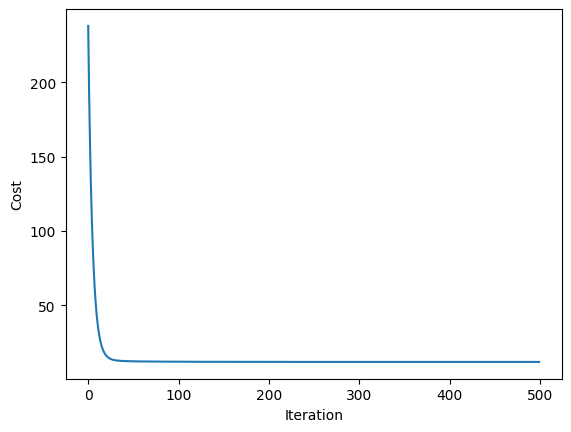

In [42]:
plt.plot(np.arange(len(J_hist)), J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# Evaluating

We'll Evaluate the model on a testing dataset

In [43]:
def evaluate(x, y, w, b):
    y_pred = np.dot(x, w) + b

    y_mean = np.mean(y)
    sum_actual = np.sum((y - y_mean)**2)

    sum_pred = np.sum((y_test - y_pred)**2)

    score = 1 - (sum_pred / sum_actual)
    
    return score

print(evaluate(x_test, y_test, w, b))

0.7197595059507242


## Conclusion

Based on implementation of same data on sklearn in the other notebook, we can obtained a score of roughly 0.615 whereas our implementaion achieves 0.71 on unseen data thus our implementation is better.